<h1>Búsqueda No Informada y Heurística</h1>
<p>
    En general, un problema de búsqueda se compone de:
    <ul>
        <li>Un nodo inicial</li>
        <li>Una función que devuelve los hijos del nodo</li>
        <li>Una función que booleana que devuelve TRUE si el nodo es uno de los objetivos</li>
        <li>Una función que devuelve la heurística del nodo</li>
    </ul>
</p>
La siguiente función provee una clase abstracta para un problema de búsqueda

In [1]:
class generic_search_problem(object):
    
    def is_goal(self,node,goal):
        raise NotImplementedError("is_goal")
    
    def get_children(self,node):
        raise NotImplementedError("get_children")
    
    def search(self):
        raise NotImplementedError("search")


In [2]:
from heapq import heappush,heappop
import numpy as np

class puzzle(object):
    
    def __init__(self,node,level):
        self.state=node
        self.level=level
        
    def __hash__(self):
        return hash(np.array_str(self.state.ravel()))
        
    def __eq__(self,other):
        return np.array_equal(other.state,self.state)

    
    def __gt__(self,other):
        return self.level>other.level

    def __lt__(self,other):
        return self.level<other.level
   
    def pretty_print(self):
        return np.array_str(self.state.ravel())
 
    def solvable(self):
        return len([(a,b) for i,a in enumerate(self.state.ravel()) for b in self.state.ravel()[i:] if a>b & b!=0])%2==0
    
    def get_children(self):
        child_list=set()
        dim=self.state.shape[0]
        i,j=map(np.int,np.where(self.state==0))
        #print i,j
        if (j>0):
            child=self.state.copy()
            child[i,j]=self.state[i,j-1]
            child[i,j-1]=0
            p=puzzle(child,self.level+1)
            child_list.add(p)
        if (j<dim-1):
            child=self.state.copy()
            child[i,j]=self.state[i,j+1]
            child[i,j+1]=0
            p=puzzle(child,self.level+1)
            child_list.add(p)
        if (i>0):
            child=self.state.copy()
            child[i,j]=self.state[i-1,j]
            child[i-1,j]=0
            p=puzzle(child,self.level+1)
            child_list.add(p)
        if (i<dim-1):
            child=self.state.copy()
            child[i,j]=self.state[i+1,j]
            child[i+1,j]=0
            p=puzzle(child,self.level+1)
            child_list.add(p)
        return child_list

In [3]:
dim=3

goal=puzzle(np.insert(np.arange(1,dim*dim),dim*dim-1,0).reshape(dim,dim),0)

easy_start=puzzle(np.insert(np.arange(1,dim*dim),6,0).reshape(dim,dim),0)



In [31]:
print('nodo objetivo : ')
print(goal.state)
print('nodo inicial : ')
print(easy_start.state)
print('hijos : ')
for p in easy_start.get_children():
    print('Estado padre, nivel : {0}'.format(p.level))
    print(p.state)
    for c in p.get_children():
        print('Estado hijo, nivel : {0}'.format(c.level))
        print(c.state)

nodo objetivo : 
[[1 2 3]
 [4 5 6]
 [7 8 0]]
nodo inicial : 
[[1 2 3]
 [4 5 6]
 [0 7 8]]
hijos : 
Estado padre, nivel : 1
[[1 2 3]
 [4 5 6]
 [7 0 8]]
Estado hijo, nivel : 2
[[1 2 3]
 [4 0 6]
 [7 5 8]]
Estado hijo, nivel : 2
[[1 2 3]
 [4 5 6]
 [0 7 8]]
Estado hijo, nivel : 2
[[1 2 3]
 [4 5 6]
 [7 8 0]]
Estado padre, nivel : 1
[[1 2 3]
 [0 5 6]
 [4 7 8]]
Estado hijo, nivel : 2
[[1 2 3]
 [4 5 6]
 [0 7 8]]
Estado hijo, nivel : 2
[[1 2 3]
 [5 0 6]
 [4 7 8]]
Estado hijo, nivel : 2
[[0 2 3]
 [1 5 6]
 [4 7 8]]


In [47]:
from collections import deque

class bfs_puzzle(generic_search_problem):
    
    def __init__(self,start):
        self.state=start
            
    def is_goal(self,node,goal):
        return node==goal
    
    def get_children(self,node):
        return node.get_children()
    
    def search(self,goal):
        parents={}
        visited=set()
        parents.update({self.state:None})
        frontier=deque() # queue
        frontier.append(self.state)
        while frontier:
            node=frontier.popleft() # FIFO
            if self.is_goal(node,goal):
                return parents
            visited.add(node)
            for child in self.get_children(node):
                if child not in visited and child not in frontier:
                    parents.update({child:node})
                    frontier.append(child)
        return parents
    
class dfs_puzzle(generic_search_problem):
    
    def __init__(self,start):
        self.state=start
            
    def is_goal(self,node,goal):
        return node==goal
    
    def get_children(self,node):
        return node.get_children()
    
    def search(self,goal):
        parents={}
        visited=set()
        parents.update({self.state:None})
        frontier=deque() # stack
        frontier.append(self.state)
        while frontier:
            node=frontier.pop() # LIFO
            if self.is_goal(node,goal):
                return parents
            visited.add(node)
            for child in self.get_children(node):
                if child not in visited and child not in frontier:
                    parents.update({child:node})
                    frontier.append(child)
        return parents
    
def get_path(search_results,goal):
    path=[key  for (key, value) in search_results.items() if key == goal]
    node=goal
    while search_results[node] is not None:
        parent=search_results[node]
        path.append(parent)
        node=parent
    return path

In [53]:
import sys
bfs_tree=bfs_puzzle(easy_start).search(goal)

for p in get_path(bfs_tree,goal):
    print('-------------------------')
    print('nivel : {0}'.format(p.level))
    print(p.state)

print('BFS memoria : {0:.2f} [kB]'.format(sys.getsizeof(bfs_tree)/1024))    

-------------------------
nivel : 2
[[1 2 3]
 [4 5 6]
 [7 8 0]]
-------------------------
nivel : 1
[[1 2 3]
 [4 5 6]
 [7 0 8]]
-------------------------
nivel : 0
[[1 2 3]
 [4 5 6]
 [0 7 8]]
BFS memoria : 0.36 [kB]


In [55]:
dfs_tree=dfs_puzzle(easy_start).search(goal)

for p in get_path(dfs_tree,goal):
    print('-------------------------')
    print('nivel : {0}'.format(p.level))
    print(p.state)
    
print('DFS memoria : {0:.2f} [kB]'.format(sys.getsizeof(dfs_tree)/1024))  

KeyboardInterrupt: 

In [64]:
class ids_puzzle(generic_search_problem):
    
    def __init__(self,start):
        self.state=start
            
    def is_goal(self,node,goal):
        return node==goal
    
    def get_children(self,node):
        return node.get_children()
    
    def search(self,goal,bound):
        parents={}
        visited=set()
        parents.update({self.state:None})
        frontier=deque() # stack
        frontier.append(self.state)
        while frontier:
            node=frontier.pop() # LIFO
            if self.is_goal(node,goal):
                return parents
            visited.add(node)
            if node.level<bound:
                for child in self.get_children(node):
                    if child not in visited and child not in frontier:
                        parents.update({child:node})
                        frontier.append(child)
        return parents

In [66]:
import sys
ids_tree=ids_puzzle(easy_start).search(goal,bound=2)

for p in get_path(ids_tree,goal):
    print('-------------------------')
    print('nivel : {0}'.format(p.level))
    print(p.state)

print('cota :{0}, memoria : {1:.2f} [kB]'.format(2,sys.getsizeof(ids_tree)/1024))  

-------------------------
nivel : 2
[[1 2 3]
 [4 5 6]
 [7 8 0]]
-------------------------
nivel : 1
[[1 2 3]
 [4 5 6]
 [7 0 8]]
-------------------------
nivel : 0
[[1 2 3]
 [4 5 6]
 [0 7 8]]
cota :2, memoria : 0.36 [kB]


In [67]:
while True:
    random_start=puzzle(np.random.permutation(np.arange(9)).reshape(dim,dim),0)
    if random_start.solvable() : break

In [68]:
import sys
for c in np.arange(1,23):
    ids_tree=ids_puzzle(random_start).search(goal,bound=c)
    print('cota :{0}, memoria : {1:.2f} [kB]'.format(c,sys.getsizeof(ids_tree)/1024))   

cota :1, memoria : 0.23 [kB]
cota :2, memoria : 0.36 [kB]
cota :3, memoria : 0.63 [kB]
cota :4, memoria : 1.16 [kB]
cota :5, memoria : 2.23 [kB]
cota :6, memoria : 4.59 [kB]
cota :7, memoria : 9.10 [kB]
cota :8, memoria : 9.10 [kB]
cota :9, memoria : 18.09 [kB]
cota :10, memoria : 18.09 [kB]
cota :11, memoria : 36.10 [kB]
cota :12, memoria : 36.10 [kB]
cota :13, memoria : 36.10 [kB]
cota :14, memoria : 72.09 [kB]
cota :15, memoria : 144.10 [kB]
cota :16, memoria : 144.10 [kB]
cota :17, memoria : 144.10 [kB]
cota :18, memoria : 144.10 [kB]
cota :19, memoria : 288.09 [kB]
cota :20, memoria : 288.09 [kB]
cota :21, memoria : 576.10 [kB]
cota :22, memoria : 288.09 [kB]


<h2>Búsqueda Heurística</h2>
A diferencia de la búqueda no informada, la estrategia de búsqueda denominada best-first es un método del tipo greedy que incorpora al costo $h(n)$ del nodo $n$ hacia el objetivo. La estrategia de búsqueda greedy best-first selecciona el candidato $n \in \operatorname{GET\_CHILDREN}$ con
mejor puntuación $f(n) = h(n)$ en cada momento.

la estrategia de búsqueda A* es también un método del tipo greedy que incorpora al costo $h(n)$ del nodo $n$ hacia el objetivo así como también el costo acumulado $g(n)$ de llegar hacia $n$. La estrategia de búsqueda greedy best-first selecciona el candidato $n \in \operatorname{GET\_CHILDREN}$ con
mejor puntuación $f(n) = h(n)+g(n)$ en cada momento.

<h1>Implementación A* Puzzle 8</h1>
<p>
El problema del 8-puzzle fue inventado en 1870 y se juega en una grilla de 3x3 con 9 bloques cuadrados. Cada bloque tiene una etiqueta con un número del 1 al 8 y existe un espacio en blanco en el cual el jugador puede mover un bloque adyacente.   
</p>
    

In [70]:
from IPython.display import Image
#Image(filename='../figures/8_puzzle.png') 
    

<p>
Cada estado del puzzle puede ser visto como un vértice de un grafo tipo árbol, cuyo nodo raiz es el estado inicial del puzzle. Las estrategias de búsqueda no-informada no utilizan ningún criterio para ponderar las soluciones y por ende dependen en gran medida de la complejidad del problema.</p>
<p>
<ul>
<li>
De modo de diseñar algoritmos ''inteligentes'', es necesario reducir el espacio de b{usqueda y concentrarse en los estados que sean  atractivos.
</li>
<li>
Dado la alta complejidad de los problemas, no es posible recorrer todos los caminos y por lo tanto solo podemos evaluar estados que sean potencialmente atractivos.
<li>
La estrategia de búsqueda A* utiliza una combinación de búsqueda local:
</li>

\begin{align}
f(n)=g(n)+h(n)
\end{align}

Donde $g(n)$ corresponde al costo de la ruta desde el nodo inicial al nodo $n$ y $h(n)$ es el costo estimado (cota inferior) desde $n$ hasta el nodo objetivo.
</ul>

Para el problema del puzzle, utlizamos las siguientes heurísticas:

<ul>
<li>
Distancia Hamming : Número de bloques en la posición incorrecta.
</li>
<li>
Distancia Manhattan : Suma de las distancias (suma de la distancia horizontal y vertical) desde el bloque hasta la posición objetivo ($d_M=\vert X_n-X_g \vert + \vert Y_n-Y_g \vert$).
</li>


In [71]:
from IPython.display import Image
#Image(filename='../figures/8_puzzle_distancias.png') 

In [77]:
def manhattan(node,goal):
    dim=node.state.shape[0]
    diff_mat=np.zeros((dim,dim))
    for i in range(dim):
        for j in range(dim):
            if goal.state[i,j]!=0:
                u,v=map(np.int,np.where(node.state==goal.state[i,j]))
                diff_mat[i,j]=abs(i-u)+abs(j-v)
    return int(diff_mat.sum())

def hamming(node,goal):
    dim=node.state.shape[0]
    diff_mat=np.zeros((dim,dim))
    diff_mat=node.state!=goal.state
    dist=np.sum(diff_mat.astype(int).ravel())
    if dist>0:
        dist=dist-1
    return dist
    


In [73]:
easy_start=puzzle(np.insert(np.arange(1,dim*dim),5,0).reshape(dim,dim),0)
print('Distancia hamming : {0}'.format(hamming(easy_start,goal)))
print('Distancia manhattan : {0}'.format(manhattan(easy_start,goal)))

Distancia hamming : 3
Distancia manhattan : 5


In [74]:
class bestfirst_puzzle(generic_search_problem):
    
    def __init__(self,start,heuristic):
        self.state=start
        self.heuristic=heuristic
            
    def is_goal(self,node,goal):
        return node==goal
    
    def get_children(self,node):
        return node.get_children()
    
    def search(self,goal):
        parents={}
        visited=set()
        parents.update({self.state:None})
        frontier=[]
        heappush(frontier,(self.heuristic(self.state,goal),self.state))
        while frontier:
            node=heappop(frontier)[1]
            if self.is_goal(node,goal):
                return parents,len(frontier),len(visited)
            visited.add(node)
            for child in self.get_children(node):
                if child not in visited:
                    parents.update({child:node})
                    heappush(frontier,(self.heuristic(child,goal),child))
        return parents,len(frontier),len(visited)

In [82]:
solver=bestfirst_puzzle(random_start,hamming)
bf_tree,k,h=solver.search(goal)
path=get_path(bf_tree,goal)

for p in path:
    print(p.state,p.level)
    print('---------------')
print('frontier : {0}, visited : {1}'.format(k,h))
    
print('Best-First memoria : {0:.2f} [kB]'.format(sys.getsizeof(bf_tree)/1024))  
    

[[1 2 3]
 [4 5 6]
 [7 8 0]] 47
---------------
[[1 2 3]
 [4 5 0]
 [7 8 6]] 46
---------------
[[1 2 0]
 [4 5 3]
 [7 8 6]] 45
---------------
[[1 0 2]
 [4 5 3]
 [7 8 6]] 44
---------------
[[1 5 2]
 [4 0 3]
 [7 8 6]] 43
---------------
[[1 5 2]
 [4 3 0]
 [7 8 6]] 42
---------------
[[1 5 2]
 [4 3 6]
 [7 8 0]] 41
---------------
[[1 5 2]
 [4 3 6]
 [7 0 8]] 40
---------------
[[1 5 2]
 [4 0 6]
 [7 3 8]] 39
---------------
[[1 0 2]
 [4 5 6]
 [7 3 8]] 38
---------------
[[1 2 0]
 [4 5 6]
 [7 3 8]] 37
---------------
[[1 2 6]
 [4 5 0]
 [7 3 8]] 36
---------------
[[1 2 6]
 [4 0 5]
 [7 3 8]] 35
---------------
[[1 2 6]
 [4 3 5]
 [7 0 8]] 34
---------------
[[1 2 6]
 [4 3 5]
 [7 8 0]] 33
---------------
[[1 2 6]
 [4 3 0]
 [7 8 5]] 32
---------------
[[1 2 0]
 [4 3 6]
 [7 8 5]] 31
---------------
[[1 0 2]
 [4 3 6]
 [7 8 5]] 30
---------------
[[0 1 2]
 [4 3 6]
 [7 8 5]] 29
---------------
[[4 1 2]
 [0 3 6]
 [7 8 5]] 28
---------------
[[4 1 2]
 [3 0 6]
 [7 8 5]] 27
---------------
[[4 0 2]
 [3 

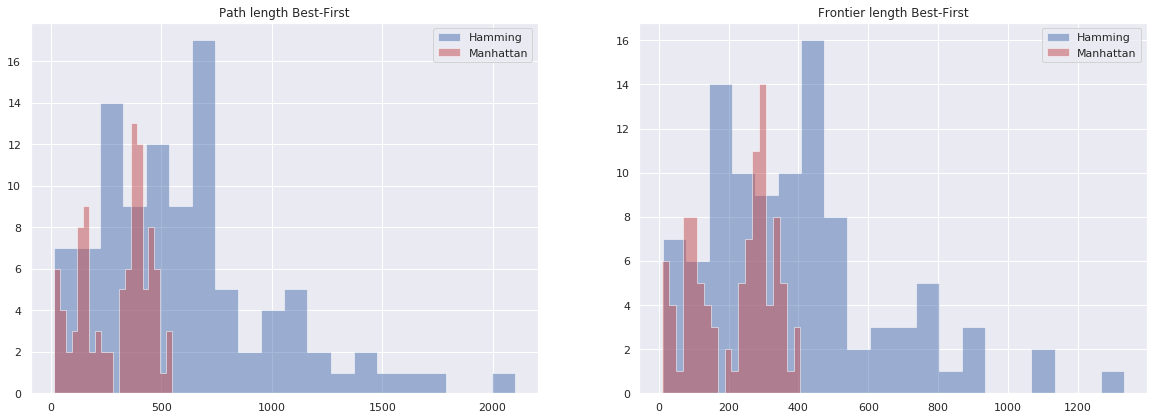

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

hamming_path=[]
hamming_frontier=[]
manhattan_path=[]
manhattan_frontier=[]

        
for i in range(100):
    while True:
        random_start=puzzle(np.random.permutation(np.arange(dim*dim)).reshape((dim,dim)),0)
        if random_start.solvable() : break
    solver1=bestfirst_puzzle(random_start,hamming)
    solver2=bestfirst_puzzle(random_start,manhattan)
    p1,i,j=solver1.search(goal)
    p2,k,h=solver2.search(goal)
    hamming_path.append(j)
    hamming_frontier.append(i)
    manhattan_path.append(h)
    manhattan_frontier.append(k)
    

plt.figure(figsize=(20,15))
plt.plot([1,2,3])
plt.subplot(221)
plt.hist(hamming_path,bins=20 , histtype='stepfilled', color='b', alpha=0.5, label='Hamming')
plt.hist(manhattan_path,bins=20, histtype='stepfilled',  color='r', alpha=0.5, label='Manhattan') 
plt.title("Path length Best-First")
plt.legend()
plt.subplot(222)
plt.hist(hamming_frontier,bins=20, histtype='stepfilled',  color='b', alpha=0.5, label='Hamming') 
plt.hist(manhattan_frontier,bins=20, histtype='stepfilled', color='r', alpha=0.5, label='Manhattan') 
plt.title("Frontier length Best-First")
plt.legend()
plt.show()